In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import models

In [67]:
# Carrega os dados, ignorando a primeira linha
df = pd.read_csv(f'{models.path_dados_tratados}/ordens_2/Dados_Normalizados.csv', header=0)
df = pd.DataFrame(df)[models.colunas]

df['sensor'] = df['sensor'].replace(models.sensores)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [68]:
# Treina o classificador
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avalia a precisão do classificador
acc = accuracy_score(y_test, y_pred)
print("A precisão do classificador é:", acc)

A precisão do classificador é: 0.9060431347426863


In [69]:
import tensorflow as tf

class NeuralNetworkClassifier:
    def __init__(self, hidden_layer_sizes, classifier_type):
        # Guarda o número de neurônios para cada camada oculta
        self.hidden_layer_sizes = hidden_layer_sizes
        # Guarda o tipo de classificador que será usado (binário ou multiclasse)
        self.classifier_type = classifier_type

    def build_model(self, input_shape, num_classes):
        # Cria uma rede neural sequencial
        model = tf.keras.Sequential()
        # Adiciona uma camada de achatamento para formar a entrada para a rede
        model.add(tf.keras.layers.Flatten(input_shape=input_shape))
        
        # Loop para adicionar as camadas ocultas com os tamanhos especificados
        for size in self.hidden_layer_sizes:
            model.add(tf.keras.layers.Dense(size, activation='relu'))
        
        # Dependendo do tipo de classificador, adiciona a camada de saída adequada
        if self.classifier_type == 'binary':
            model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        else:
            model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Retorna o modelo construído
        return model


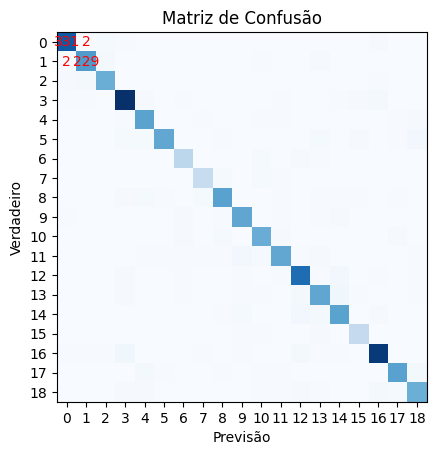

A precisão do classificador é: 0.9064702114029468
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.97      0.96      0.96       345
               ball_fault_baixo       0.94      0.93      0.94       245
               ball_fault_medio       0.93      0.93      0.93       212
                cage_fault_alto       0.91      0.94      0.92       421
               cage_fault_baixo       0.88      0.94      0.91       231
               cage_fault_medio       0.97      0.85      0.90       247
 desalinhamento_horizontal_alto       0.87      0.90      0.89       123
desalinhamento_horizontal_baixo       0.89      0.87      0.88       109
desalinhamento_horizontal_médio       0.91      0.89      0.90       246
   desalinhamento_vertical_alto       0.89      0.93      0.91       227
  desalinhamento_vertical_baixo       0.88      0.92      0.90       218
  desalinhamento_vertical_médio       0.91  

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from  sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import models

# Carrega os dados
df = df

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Treina o classificador
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)), range(len(models.defeitos)))
plt.yticks(range(len(models.defeitos)), range(len(models.defeitos)))
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))
